In [ ]:
#lien de documentation du travail : https://colab.research.google.com/drive/1FDk44rB1vbgfsDBkgPPiQTCjgcv0fzIW#scrollTo=Nd0_55Q19Taz

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -------------------------- ------------- 5.2/8.0 MB 27.0 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 21.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 23.7 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
%pip install seaborn 

In [209]:
%pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ------- -------------------------------- 3.7/19.1 MB 19.6 MB/s eta 0:00:01
   ----------------- ---------------------- 8.4/19.1 MB 21.5 MB/s eta 0:00:01
   ---------------------------- ----------- 13.4/19.1 MB 22.4 MB/s eta 0:00:01
   ------------------------------------- -- 18.1/19.1 MB 22.7 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 21.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [212]:
%pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install pycountry


   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------- -------------------------- 2.1/6.3 MB 11.5 MB/s eta 0:00:01
   ------------------------------- -------- 5.0/6.3 MB 12.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 12.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
from datetime import datetime


In [2]:
pd.set_option('display.max_colwidth', None)

In [ ]:
os.makedirs('datasets_nettoye', exist_ok=True)

In [ ]:
"""Contributeurs principaux : Acteurs, actrices, réalisateurs , ecrivants (title.principals).

Films ayant une note suffisante : Note moyenne (≥ 6), durée (≥ 60 min), et nombre de votes (≥ 10 000) dans title.ratings.
"""

In [18]:
def summarize_dataframe(df,df_name):
    print(f"Résumé du {df_name}")
    print("Shape :", df.shape)
    print("Types de données :")
    df.info()
    print(f"\n Apercu des premières lignes du {df_name} :")
    display(df.head())
    
    # Calcul des valeurs manquantes par colonne et du total
    missing_values = df.isna().sum()
    total_missing = missing_values.sum()
    print(f"Valeurs manquantes par colonne dans {df_name} :")
    print(missing_values)
    print(f"Total des valeurs manquantes dans {df_name} :", total_missing)
    
    # Tracer le graphique si des valeurs manquantes existent
    if total_missing > 0:
        percent_nan = (missing_values / len(df)) * 100
        percent_nan_sorted = percent_nan.sort_values(ascending=False)
        
        plt.figure(figsize=(8, 5))
        bars = plt.bar(percent_nan_sorted.index, percent_nan_sorted, color='blue')
        
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', va='bottom', ha='center')
        
        plt.ylim(0, 100)
        plt.title(f'% de Valeurs Manquantes par Variable dans {df_name}', loc='center')
        plt.xlabel('Variables', fontsize=18)
        plt.ylabel('% de valeurs manquantes', fontsize=20)
        plt.xticks(rotation=90)
        plt.show()

In [2]:
df_title_basics = pd.read_csv('datasets/title.basics.tsv',sep = "\t",na_values='\\N',low_memory=False)

Résumé du Title basics
Shape : (11311098, 9)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311098 entries, 0 to 11311097
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 776.7+ MB

 Apercu des premières lignes du Title basics :


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,Short


Valeurs manquantes par colonne dans Title basics :
tconst                   0
titleType                0
primaryTitle            19
originalTitle           19
isAdult                  1
startYear          1418218
endYear           11177686
runtimeMinutes     7733528
genres              501741
dtype: int64
Total des valeurs manquantes dans Title basics : 20831212


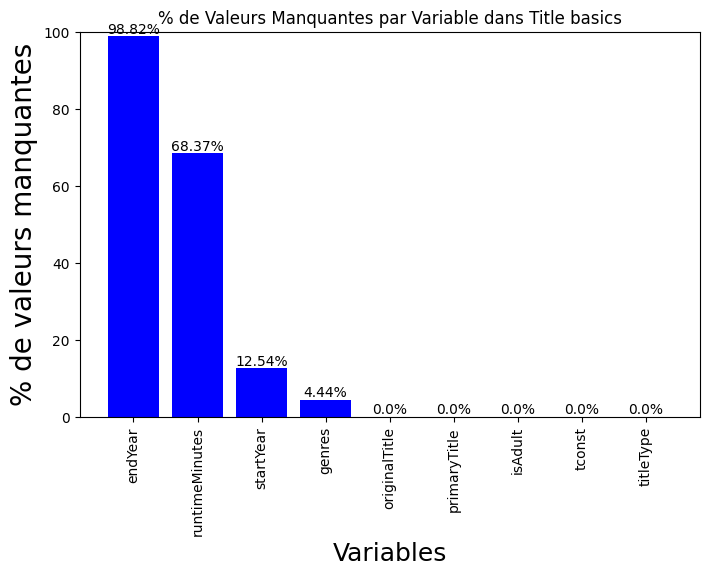

In [4]:
summarize_dataframe(df_title_basics,df_name ="Title basics")

In [15]:
print(f"Nombre d'identifiants de titres de films dupliqués : {df_title_basics.duplicated(subset=['tconst']).sum()}")

Nombre d'identifiants de titres de films dupliqués : 0


In [3]:
#print(f'Nombre total de films {len(df_title_basics)}')
print(f'Nombre total de films {df_title_basics['tconst'].nunique()}')

Nombre total de films 11311098


In [3]:
df_title_basics['isAdult'] = df_title_basics['isAdult'].fillna(0).astype(int)

In [4]:
#Supprimer les lignes dont : startYear, runtimeMinutes et genres sont des NaN
df_title_basics = df_title_basics.dropna(subset=['startYear', 'runtimeMinutes', 'genres'], how='all')

In [34]:
# Extraire les films avec des années manquantes dans df_title_basics
missing_years_df = df_title_basics[df_title_basics['startYear'].isna()]

# Vérifier si les tconst de ces films existent dans df_tmdb_full
matched_years = missing_years_df[missing_years_df['tconst'].isin(df_tmdb_full['imdb_id'])]

# Fusionner pour récupérer les années manquantes depuis df_tmdb_full
completed_years_df = missing_years_df.merge(
    df_tmdb_full[['imdb_id', 'release_year']],
    left_on='tconst',right_on ='imdb_id',
    how='left')

# Remplacer les années manquantes avec celles de release_year
df_title_basics['startYear'] = df_title_basics['startYear'].fillna(
    df_title_basics['tconst'].map(completed_years_df.set_index('tconst')['release_year'])
)

df_title_basics.drop(columns=['imdb_id'], inplace=True, errors='ignore')

In [ ]:
# Verification des années manquantes après imputation : 
print("Années manquantes après correction :", df_title_basics['startYear'].isna().sum())

Années manquantes après correction : 1338792


In [5]:
df_title_basics['startYear']=df_title_basics['startYear'].astype('Int64')

In [38]:
# Vérifier les films avec des genres combinés (séparés par des virgules)
combined_genres = df_title_basics[df_title_basics['genres'].str.contains(',', na=False)]
print(f"Nombre total de films avec des genres combinés : {len(combined_genres)}")


Nombre total de films avec des genres combinés : 4841714


In [181]:
df_title_basics['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [39]:
type_counts = df_title_basics['titleType'].value_counts()

In [40]:
type_counts

titleType
tvEpisode       8621049
short           1033857
movie            694509
video            301997
tvSeries         271813
tvMovie          148915
tvMiniSeries      58287
tvSpecial         50525
videoGame         40742
tvShort           10476
tvPilot               1
Name: count, dtype: int64

In [6]:
df_title_basics['runtimeMinutes'] = pd.to_numeric(df_title_basics['runtimeMinutes'],errors='coerce')

In [7]:
df_title_basics_clean = df_title_basics.drop(columns = 'endYear')

Les lignes sans titres dans les colonnes primaryTitle et originalTitle ont été supprimées pour garantir la qualité des données.

In [8]:
df_title_basics_clean = df_title_basics_clean.dropna(subset=['primaryTitle', 'originalTitle'],how='all')

In [9]:
df_title_basics_clean= df_title_basics_clean[df_title_basics_clean['startYear'] < datetime.now().year]

In [10]:
df_title_basics_clean['Decade'] = (df_title_basics_clean['startYear']//10)*10

In [11]:
df_title_basics_clean.isna().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear               0
runtimeMinutes    6530556
genres             416786
Decade                  0
dtype: int64

In [12]:
mean_runtime_by_type = df_title_basics_clean.groupby('titleType')['runtimeMinutes'].mean().round(2)
mean_runtime_by_type

titleType
movie            89.68
short            13.07
tvEpisode        38.14
tvMiniSeries     76.20
tvMovie          71.84
tvPilot            NaN
tvSeries         45.92
tvShort          12.06
tvSpecial        86.40
video            68.96
videoGame       106.90
Name: runtimeMinutes, dtype: float64

In [13]:
mean_runtime_by_type = mean_runtime_by_type.fillna(df_title_basics_clean['runtimeMinutes'].mean())

In [14]:
mean_runtime_by_type

titleType
movie            89.680000
short            13.070000
tvEpisode        38.140000
tvMiniSeries     76.200000
tvMovie          71.840000
tvPilot          43.538608
tvSeries         45.920000
tvShort          12.060000
tvSpecial        86.400000
video            68.960000
videoGame       106.900000
Name: runtimeMinutes, dtype: float64

In [15]:
df_title_basics_clean['runtimeMinutes'] = df_title_basics_clean.apply(
    lambda row: mean_runtime_by_type[row['titleType']] if pd.isna(row['runtimeMinutes']) else row['runtimeMinutes'], axis=1)

In [21]:
df_title_basics_clean.isna().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
genres            0
Decade            0
dtype: int64

In [20]:
df_title_basics_clean['genres'] = df_title_basics_clean['genres'].fillna('divers')

In [ ]:
#df_title_basics_clean.to_csv(r'datasets_nettoye\df_title_basics_clean.csv', index=False)


In [16]:

df_title_basics_clean.to_csv('datasets_nettoye/df_title_basics_clean.csv', index=False)


In [25]:
# Filtrage des films sur les 30 dernières années
#last_30_years = df_title_basics[pd.to_numeric(df_title_basics['startYear'], errors='coerce') >= (datetime.now().year - 30)]
last_30_years = df_title_basics_clean[df_title_basics_clean['startYear'] >= (datetime.now().year - 30)]

In [ ]:
#df_title_basics['startYear'].apply(lambda x : datetime.strptime(str(int(x)),'%Y') if not pd.isna(x) else np.nan)
#retourne date 2020-01-01

objectif : 
- Films adaptés à tous les publics : Excluez les films réservés aux adultes (isAdult = 1)
- Focalisation sur les 30 dernières années pour conserver la pertinence de l'étude.
- Recupere juste le film dont titletype = Movies

In [17]:
filtered_movies = df_title_basics_clean[
    (df_title_basics_clean['titleType'] == 'movie') & 
    (df_title_basics_clean['isAdult'] == 0) & 
    (pd.to_numeric(df_title_basics_clean['startYear'], errors='coerce') >= (datetime.now().year - 30))
]

In [18]:
filtered_movies = filtered_movies.drop(columns=['titleType', 'isAdult'])

In [92]:
filtered_movies.isna().sum()

tconst            0
primaryTitle      0
originalTitle     0
startYear         0
runtimeMinutes    0
genres            0
Decade            0
dtype: int64

In [58]:
filtered_movies

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Decade
11632,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,89.69,"Action,Crime",2010
15172,tt0015414,La tierra de los toros,La tierra de los toros,2000,60.00,divers,2000
34795,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.00,"Comedy,Fantasy,Romance",2000
61104,tt0062336,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020,70.00,Drama,2020
61501,tt0062740,Blonde on a Bum Trip,Blonde on a Bum Trip,2024,65.00,Drama,2020
...,...,...,...,...,...,...,...
11310989,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.00,Documentary,2010
11311016,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100.00,Documentary,2000
11311028,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,89.69,Comedy,2010
11311038,tt9916730,6 Gunn,6 Gunn,2017,116.00,Drama,2010


In [131]:
#filtered_movies = filtered_movies.join(filtered_movies['genres'].str.get_dummies(sep=',')).drop(columns='genres')
 # encodage OHE ou chaque genre devient une colonne avec 0 et 1 

In [21]:
filtered_movies_principale= pd.merge(filtered_movies,df_title_ratings, how = 'left', on='tconst')

In [22]:
df_title_french = pd.read_csv('datasets_nettoye/title_french.csv')

In [23]:
filtered_movies_principale= filtered_movies_principale.merge(df_title_french, how = 'left', left_on='tconst',right_on='titleId')
filtered_movies_principale.drop(columns=['titleId'], inplace=True) 

In [24]:
filtered_movies_principale.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Decade,averageRating,numVotes,title_in_french
0,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,89.68,"Action,Crime",2010,NaN,NaN,NaN
1,tt0015414,La tierra de los toros,La tierra de los toros,2000,60.00,divers,2000,5.4,17.0,La terre des taureaux
2,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.00,"Comedy,Fantasy,Romance",2000,6.4,90792.0,Kate et Léopold
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020,70.00,Drama,2020,6.4,204.0,El Tango del Viudo y Su Espejo Deformante
4,tt0062740,Blonde on a Bum Trip,Blonde on a Bum Trip,2024,65.00,Drama,2020,6.0,80.0,NaN


In [25]:
filtered_movies_principale.shape

(361652, 10)

In [26]:
print(f' Nombre total de film : {filtered_movies_principale['tconst'].nunique()}')

 Nombre total de film : 361652


In [27]:
filtered_movies_principale.isna().sum()

tconst                  0
primaryTitle            0
originalTitle           0
startYear               0
runtimeMinutes          0
genres                  0
Decade                  0
averageRating      158409
numVotes           158409
title_in_french    308739
dtype: int64

In [67]:
missing_title_count = filtered_movies_principale['title_in_french'].isna().sum()
print(f"Pourcentage de NaN dans title_in_french : {missing_title_count / len(filtered_movies_principale) * 100:.2f}%")


Pourcentage de NaN dans title_in_french : 85.38%


In [28]:
# alors filtered_movie_principale est df_title_basics et df_ratings
filtered_movies_principale = filtered_movies_principale.drop(columns ='title_in_french')

In [97]:
#filtered_movies_principale['title_in_french'] = filtered_movies_principale['title_in_french'].fillna('Inconnu')

In [40]:
# Calcul de la moyenne par genre combine : 
genre_avg_rating = filtered_movies_principale.groupby('genres')['averageRating'].mean()

# Remplace les valeurs manquantes dans averagerating par la moyenne du genre combine : 
filtered_movies_principale['averageRating'] = filtered_movies_principale.apply(
    lambda row: genre_avg_rating[row['genres']] if pd.isna(row['averageRating']) else row['averageRating'],axis=1)


In [ ]:
filtered_movies_principale['averageRating'] =filtered_movies_principale['averageRating'].fillna(filtered_movies_principale['averageRating'].mean())

In [29]:
filtered_movies_principale['numVotes'] = filtered_movies_principale['numVotes'].fillna(0)

In [31]:
filtered_movies_principale.to_csv('datasets_nettoye/filtered_movies_principale.csv',index = False)

In [10]:
filtered_movies_principale = pd.read_csv('datasets_nettoye/filtered_movies_principale.csv')

In [ ]:
df_tmdb_selected.head()

In [11]:
# faire jointure avec df_tmdb_full pour recupere : original_language , popularity et overview
filtered_movies_principale_tmdb= pd.merge(filtered_movies_principale , df_tmdb_selected, left_on ='tconst',right_on='imdb_id', how='left')
filtered_movies_principale_tmdb = filtered_movies_principale_tmdb.drop('imdb_id', axis=1)

In [3]:
filtered_movies_principale_tmdb = pd.read_csv('datasets_nettoye/filtered_movies_principale_tmdb.csv')

In [4]:
filtered_movies_principale_tmdb.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Decade,averageRating,numVotes,budget,revenue,popularity,original_language,poster_path,overview
0,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,89.68,"Action,Crime",2010,5.637255,0.0,0.0,0.0,0.6000,German,/39PDyEcYl2B3XeRcsCXJ4V72g8x.jpg,The director and co-writer Lupu Pick plays mus...
1,tt0015414,La tierra de los toros,La tierra de los toros,2000,60.00,divers,2000,5.400000,17.0,NaN,NaN,0.6565,unknown,unknown,unknown
2,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.00,"Comedy,Fantasy,Romance",2000,6.400000,90792.0,48000000.0,76019048.0,15.7700,English,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,When her scientist ex-boyfriend discovers a po...
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020,70.00,Drama,2020,6.400000,204.0,0.0,0.0,0.8860,Spanish,/yzbqP9woGq2wGUJh0DzVXlr3Th7.jpg,"A man whose wife has committed suicide, appea..."
4,tt0062740,Blonde on a Bum Trip,Blonde on a Bum Trip,2024,65.00,Drama,2020,6.000000,80.0,NaN,NaN,1.1310,unknown,unknown,unknown


In [5]:
print(list(filtered_movies_principale_tmdb['genres'].unique()))

['Action,Crime', 'divers', 'Comedy,Fantasy,Romance', 'Drama', 'Documentary,Sport', 'Comedy,Drama', 'Documentary', 'Horror', 'Comedy,Horror,Sci-Fi', 'Documentary,Music', 'Horror,Music,Thriller', 'Thriller', 'Comedy', 'Crime,Drama', 'Drama,Romance', 'Comedy,Drama,Fantasy', 'Action,Comedy,Romance', 'Drama,Romance,Thriller', 'Comedy,Fantasy', 'Biography,Drama,History', 'Drama,Thriller', 'Adventure,Family,History', 'Biography,Documentary,Music', 'Action', 'Animation,Drama,Thriller', 'Drama,Musical', 'Drama,Sci-Fi', 'Documentary,History,War', 'Comedy,Thriller', 'Mystery,Thriller', 'Comedy,Mystery', 'Comedy,Horror', 'Comedy,Drama,Mystery', 'Action,Drama,Romance', 'Action,Thriller', 'Action,Sci-Fi,Thriller', 'Comedy,Documentary', 'Documentary,History', 'Adventure,Family', 'Comedy,Romance', 'Action,Comedy', 'Comedy,History', 'Biography,Drama', 'Horror,Thriller', 'Crime,Drama,Mystery', 'Drama,Romance,Sport', 'Drama,Fantasy,Romance', 'Crime,Drama,Thriller', 'Action,Drama,Thriller', 'Action,Drama,

In [5]:
filtered_movies_principale_tmdb.isna().sum()

tconst                    0
primaryTitle              0
originalTitle             0
startYear                 0
runtimeMinutes            0
genres                    0
Decade                    0
averageRating             0
numVotes                  0
budget               238517
revenue              238517
popularity                0
original_language         0
poster_path               0
overview                  0
dtype: int64

In [13]:
filtered_movies_principale_tmdb['original_language']= filtered_movies_principale_tmdb['original_language'].fillna('unknown')
filtered_movies_principale_tmdb['overview']= filtered_movies_principale_tmdb['overview'].fillna('unknown')
filtered_movies_principale_tmdb['poster_path']= filtered_movies_principale_tmdb['poster_path'].fillna('unknown')

In [17]:
filtered_movies_principale_tmdb['popularity'].describe()

count    123135.000000
mean          4.209637
std          33.185675
min           0.600000
25%           0.797000
50%           1.400000
75%           3.083500
max        5089.969000
Name: popularity, dtype: float64

In [6]:
filtered_movies_principale_tmdb = filtered_movies_principale_tmdb.drop(columns=['popularity']) 

In [7]:
filtered_movies_principale_tmdb['popularity'] = filtered_movies_principale_tmdb['averageRating']*filtered_movies_principale_tmdb['numVotes']

In [11]:
# pour power BI sans overview car il bloque le donnée 
filtered_movies_principale_tmdb_s=filtered_movies_principale_tmdb.drop(columns=['overview','poster_path'])

In [12]:
filtered_movies_principale_tmdb_s.to_csv('datasets_nettoye/filtered_movies_principale_tmdb_s.csv',index = False)

In [8]:
filtered_movies_principale_tmdb.to_csv('datasets_nettoye/filtered_movies_principale_tmdb.csv',index = False)

In [45]:
# Prepare un dataframe pour calculer le nombre de films par genre : 
filtered_movies_principale['genres'] = filtered_movies_principale['genres'].apply(lambda x : x.split(',') if pd.notna(x) else [np.nan])
filtered_movies_principale_exploded = filtered_movies_principale.explode('genres')
filtered_movies_principale_exploded['genres'] = filtered_movies_principale_exploded['genres'].apply(lambda x : x.strip().lower().capitalize())
filtered_movies_principale_exploded['genres'] = filtered_movies_principale_exploded['genres'].replace('Music', 'Musical')

In [46]:
filtered_movies_principale_exploded['genres'].unique()

array(['Action', 'Crime', 'Divers', 'Comedy', 'Fantasy', 'Romance',
       'Drama', 'Documentary', 'Sport', 'Horror', 'Sci-fi', 'Musical',
       'Thriller', 'Biography', 'History', 'Adventure', 'Family',
       'Animation', 'War', 'Mystery', 'Western', 'Reality-tv', 'News',
       'Talk-show', 'Game-show'], dtype=object)

In [47]:
filtered_movies_principale_exploded.to_csv('datasets_nettoye/filtered_movies_principale_exploded.csv',index = False)

In [2]:
df_title_principals = pd.read_csv('datasets/title.principals.tsv',sep = "\t",na_values='\\N')

Résumé du Title principals
Shape : (89775675, 6)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89775675 entries, 0 to 89775674
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.0+ GB

 Apercu des premières lignes du Title principals :


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN


Valeurs manquantes par colonne dans Title principals :
tconst               0
ordering             0
nconst               0
category             0
job           72983984
characters    46295592
dtype: int64
Total des valeurs manquantes dans Title principals : 119279576


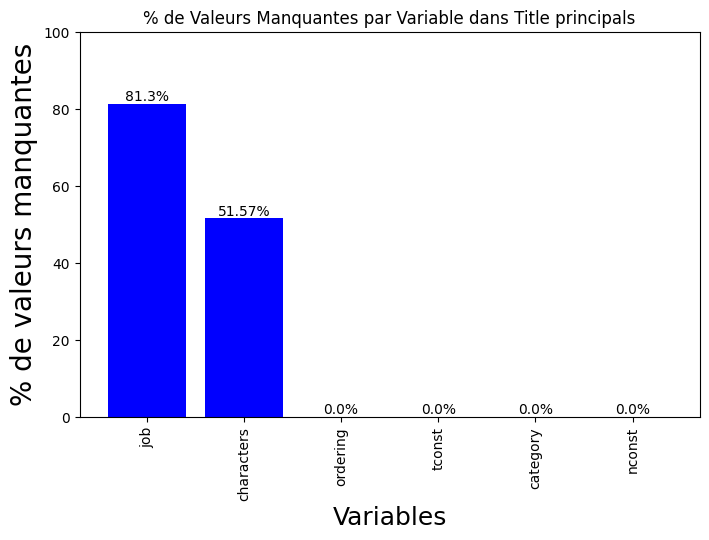

In [6]:
summarize_dataframe(df_title_principals,df_name ="Title principals")

In [ ]:
unique_values_characters = df_title_principals['characters'].unique()
print(unique_values_characters)

In [5]:

unique_values_job = df_title_principals['job'].unique()
print(list(unique_values_job))

[nan, 'producer', 'director of photography', 'editor', 'screenplay', 'story', 'story "Cendrillon"', 'novel', 'writer', 'novel "Trilby"', 'poem', 'composer', 'play', 'adaptation', 'production_designer', 'play "Hamlet"', 'comic strip "Happy Hooligan"', 'story "Le petit chaperon rouge"', "play 'Scrooge'", 'novel "A Christmas Carol"', 'tale', 'novel "L\'Assommoir"', 'novel "Alice\'s Adventures in Wonderland"', 'novel "The Travels of Gulliver"', 'scenario', 'poem "The Song of Hiawatha"', 'novel "Uncle Tom\'s Cabin"', 'play "Le Voyage a travers l\'Impossible"', 'novel "Notre Dame de Paris"', 'play "Raffles, the Amateur Cracksman"', 'comic strip', 'cinematographer', 'poem "The Night Before Christmas"', 'play "Le Quatre Cents Coups du diable"', 'play "Le Quatre Cents Coups de diable"', 'novel "Vingt Mille Lieues sous les mers"', 'novel and play "La dame aux camélias"', 'pantomime', 'from the story by', 'opera', 'play "Othello"', 'play "Terra baixa"', 'story "Enoch Arden"', 'director', 'novella

In [14]:
unique_value_category = df_title_principals['category'].unique()
print(f'{unique_value_category}')

array(['self', 'director', 'producer', 'cinematographer', 'composer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'casting_director', 'archive_sound'],
      dtype=object)

Probléme : Dans le DataFrame "df_title_principals", chaque ligne représente une contribution à un film (tconst).
Un film (tconst) peut avoir plusieurs contributeurs (nconst) jouant différents rôles (category).
Cependant, il ne devrait pas y avoir de doublons pour un même film (tconst), avec le même personnage (nconst) 
jouant le même rôle (category).

In [4]:
#But : Calculer le nombre total de doublons dans le DataFrame df_title_principals
#subset : Limite la détection des doublons aux colonnes tconst (film), nconst (personne) et category (rôle).
#keep=False : Indique que toutes les occurrences des doublons doivent être marquées (pas seulement la première ou la dernière).
#.sum() : Compte le nombre total de lignes marquées comme doublons

np.int64(3195069)

In [3]:

# Vérifier si un même personnage (nconst) joue le même rôle (category) dans un même film (tconst)
duplicate_count = df_title_principals.duplicated(subset=['tconst', 'nconst', 'category'], keep=False).sum()
print(f"Nombre de fois où le même personnage a le même rôle dans le même film : {duplicate_count}")

Nombre de fois où le même personnage a le même rôle dans le même film : 3195069


In [6]:
df_doublons = df_title_principals[df_title_principals.duplicated(subset=['tconst', 'nconst', 'category'], keep=False)]
display(df_doublons)

,tconst,ordering,nconst,category,job,characters
505,tt0000230,6,nm0617588,actor,NaN,"[""Le gnome de la pendule""]"
506,tt0000230,7,nm0617588,actor,NaN,"[""Le suisse à l'entrée de l'église""]"
517,tt0000235,2,nm0617588,actor,NaN,"[""The Devil""]"
518,tt0000235,3,nm0617588,actor,NaN,"[""The Devil""]"
750,tt0000359,1,nm0617588,actor,NaN,"[""The Chemist""]"
...,...,...,...,...,...,...
89775665,tt9916880,12,nm2676923,actress,NaN,"[""Sour Susan""]"
89775666,tt9916880,13,nm2676923,actress,NaN,"[""Goody-Goody Gordon""]"
89775667,tt9916880,14,nm2676923,actress,NaN,"[""Singing Soraya""]"
89775668,tt9916880,15,nm1469295,actress,NaN,"[""Perfect Peter""]"


Problème :
Les doublons identifiés dans le DataFrame "df_title_principals" montrent que certains acteurs ou actrices (même combinaison de tconst, nconst, et category) sont enregistrés plusieurs fois pour un même film, uniquement parce que leur personnage ou rôle dans le film est différent (colonne characters).
Cependant, l'information la plsu importante pour l'analyse est simplement la participation de l'acteur/actrice au film (et non son personnage), ces doublons ne sont pas nécessaires et peuvent être supprimés pour optimiser la taille et la lisibilité des données.

La même personne (nconst) est associée au même rôle (category) dans le même film (tconst) plusieurs fois.
Ces doublons n'apportent aucune valeur ajoutée, car ils répètent la même information.

In [4]:
# Supprimer les doublons en gardant une seule occurrence (la première par défaut).
# Cela assure qu'il n'y a qu'une seule contribution unique par film (tconst), personnage (nconst), et rôle (category).
df_title_principals_cleaned = df_title_principals.drop_duplicates(subset=['tconst', 'nconst', 'category'], keep='first')

In [5]:
# Supprimer les colonnes inutiles
# La colonne 'characters' est supprimée car elle ne joue pas un rôle important dans notre analyse.
# La colonne 'job' est supprimée car elle contient trop de valeurs manquantes
df_title_principals_cleaned = df_title_principals_cleaned.drop(columns={'characters','job'})

In [6]:
#Filtrer uniquement les lignes où la catégorie correspond à des rôles pertinents : 
# actor, actress, producer, director, writer
df_title_principals_cleaned = df_title_principals_cleaned[df_title_principals_cleaned['category'].astype(str).str.contains('actor|actress|producer|director|writer', regex=True, na=False)]

In [11]:
print(f"Dimensions avant nettoyage : {df_title_principals.shape}")
print(f"Dimensions après nettoyage : {df_title_principals_cleaned.shape}")

Dimensions avant nettoyage : (89775675, 6)
Dimensions après nettoyage : (62504847, 4)


- Le DataFrame nettoyé df_title_principals_cleaned ne contient plus de doublons non souhaités.
- Chaque combinaison de tconst, nconst, et category est unique.
- Seules les informations sur les acteurs, actrices, producteurs, réalisateurs, et scénaristes sont conservées.

In [7]:
df_title_principals_cleaned

,tconst,ordering,nconst,category
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0005690,producer
4,tt0000002,1,nm0721526,director
6,tt0000003,1,nm0721526,director
7,tt0000003,2,nm1770680,producer
...,...,...,...,...
89775670,tt9916880,17,nm0996406,director
89775671,tt9916880,18,nm1482639,writer
89775672,tt9916880,19,nm2586970,writer
89775673,tt9916880,20,nm1594058,producer


In [8]:
df_title_principals_cleaned.to_csv('datasets_nettoye/df_title_principals_clean.csv',index = False)

In [20]:
df_title_ratings = pd.read_csv('datasets/title.ratings.tsv',sep = "\t",na_values='\\N')

In [8]:
summarize_dataframe(df_title_ratings,df_name ="Title ratings")

Résumé du Title ratings
Shape : (1511985, 3)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511985 entries, 0 to 1511984
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1511985 non-null  object 
 1   averageRating  1511985 non-null  float64
 2   numVotes       1511985 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.6+ MB

 Apercu des premières lignes du Title ratings :


,tconst,averageRating,numVotes
0,tt0000001,5.7,2109
1,tt0000002,5.6,284
2,tt0000003,6.4,2135
3,tt0000004,5.3,182
4,tt0000005,6.2,2863


Valeurs manquantes par colonne dans Title ratings :
tconst           0
averageRating    0
numVotes         0
dtype: int64
Total des valeurs manquantes dans Title ratings : 0


In [32]:
df_title_ratings.duplicated(subset='tconst',keep=False).sum()

np.int64(0)

In [17]:
df_duplicates = df_title_ratings[df_title_ratings.duplicated(subset=['tconst'], keep=False)]
print(f"Nombre de films ayant plusieurs évaluations (ratings) : {len(df_duplicates['tconst'].unique())}")

Nombre de films ayant plusieurs évaluations (ratings) : 0


In [33]:
# Filtrer les films avec des 'averageRating' et 'numVotes' non-NaN
valid_ratings_votes = df_title_ratings.dropna(subset=['averageRating', 'numVotes'])

# Afficher le nombre total de films ayant des ratings et des votes valides
print(f"Nombre total de films avec 'averageRating' et 'numVotes' valides : {valid_ratings_votes['tconst'].nunique()}")


Nombre total de films avec 'averageRating' et 'numVotes' valides : 1511985


In [9]:
df_title_episode = pd.read_csv('datasets/title.episode.tsv',sep = "\t",na_values='\\N')

Résumé du Title episode
Shape : (8690566, 4)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8690566 entries, 0 to 8690565
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tconst         object 
 1   parentTconst   object 
 2   seasonNumber   float64
 3   episodeNumber  float64
dtypes: float64(2), object(2)
memory usage: 265.2+ MB

 Apercu des premières lignes du Title episode :


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0031458,tt32857063,NaN,NaN
1,tt0041951,tt0041038,1.0,9.0
2,tt0042816,tt0989125,1.0,17.0
3,tt0042889,tt0989125,NaN,NaN
4,tt0043426,tt0040051,3.0,42.0


Valeurs manquantes par colonne dans Title episode :
tconst                 0
parentTconst           0
seasonNumber     1754002
episodeNumber    1754002
dtype: int64
Total des valeurs manquantes dans Title episode : 3508004


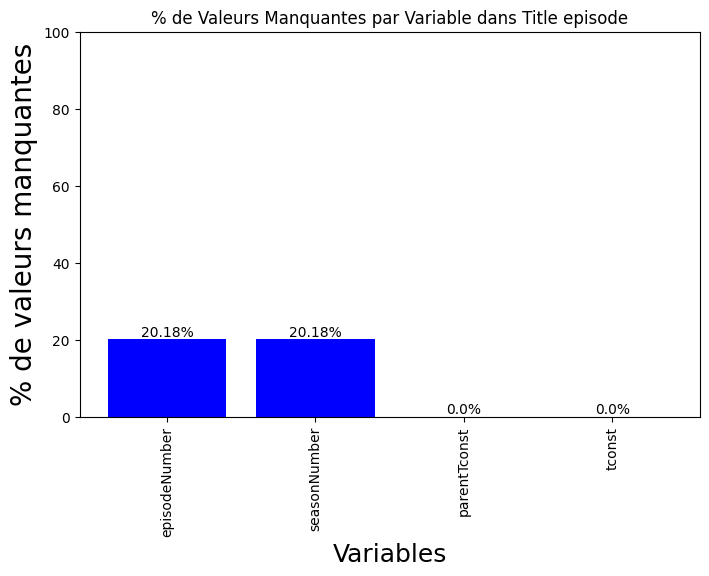

In [10]:
summarize_dataframe(df_title_episode,df_name ="Title episode")

In [8]:
df_title_crew = pd.read_csv('datasets/title.crew.tsv',sep = "\t",na_values=['\\N'])

Résumé du Title crew
Shape : (11311098, 3)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311098 entries, 0 to 11311097
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 258.9+ MB

 Apercu des premières lignes du Title crew :


,tconst,directors,writers
0,tt0000001,nm0005690,NaN
1,tt0000002,nm0721526,NaN
2,tt0000003,nm0721526,NaN
3,tt0000004,nm0721526,NaN
4,tt0000005,nm0005690,NaN


Valeurs manquantes par colonne dans Title crew :
tconst             0
directors    4892359
writers      5548210
dtype: int64
Total des valeurs manquantes dans Title crew : 10440569


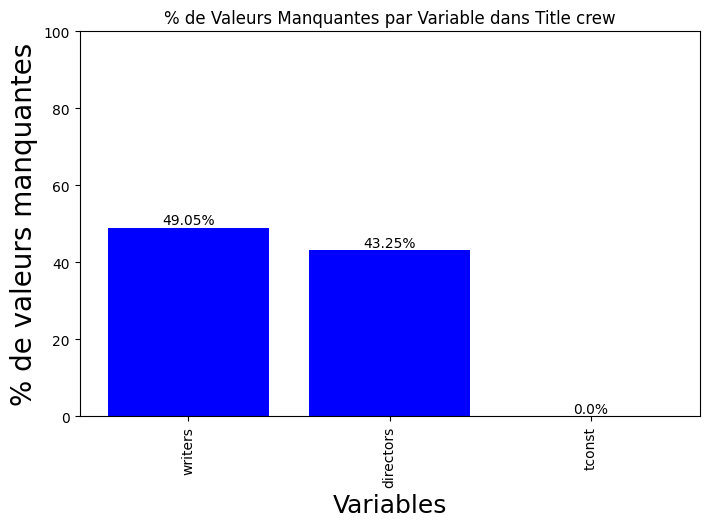

In [7]:
summarize_dataframe(df_title_crew,df_name ="Title crew")

In [ ]:
#objectif :  obtenir un DataFrame avec chaque nconst et le rôle (director ou writer)

In [9]:
df_title_crew['directors'] = df_title_crew['directors'].astype(str).apply(lambda x : x.split(',') if pd.notna(x) else [np.nan])
df_title_crew['writers'] = df_title_crew['writers'].astype(str).apply(lambda x : x.split(',') if pd.notna(x) else [np.nan])


In [10]:
df_directors = df_title_crew[['tconst','directors']].explode('directors')
df_writers = df_title_crew[['tconst','writers']].explode('writers')

In [11]:
df_directors['category'] = 'director'
df_directors = df_directors.rename(columns = {'directors':'nconst'})
df_writers['category'] = 'writer'
df_writers = df_writers.rename(columns={'writers':'nconst'})

In [12]:
df_title_crew_normalized = pd.concat([df_directors, df_writers], ignore_index=True)

In [23]:
df_title_crew_normalized.to_csv('datasets_nettoye/df_title_crew_normalized.csv',index=False)

In [19]:
df_title_akas = pd.read_csv('datasets/title.akas.tsv',sep = "\t",na_values='\\N')

C:\Users\abbou\AppData\Local\Temp\ipykernel_14608\2423969029.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title_akas = pd.read_csv('datasets/title.akas.tsv',sep = "\t",na_values='\\N')


Résumé du Title akas
Shape : (50664224, 8)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50664224 entries, 0 to 50664223
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  int64 
dtypes: int64(2), object(6)
memory usage: 3.0+ GB

 Apercu des premières lignes du Title akas :


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,NaN,NaN,original,NaN,1
1,tt0000001,2,Carmencita,DE,NaN,NaN,literal title,0
2,tt0000001,3,Carmencita,US,NaN,imdbDisplay,NaN,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0
4,tt0000001,5,Καρμενσίτα,GR,NaN,imdbDisplay,NaN,0


Valeurs manquantes par colonne dans Title akas :
titleId                   0
ordering                  0
title                    38
region             11359003
language           16702694
types              35145899
attributes         50371955
isOriginalTitle           0
dtype: int64
Total des valeurs manquantes dans Title akas : 113579589


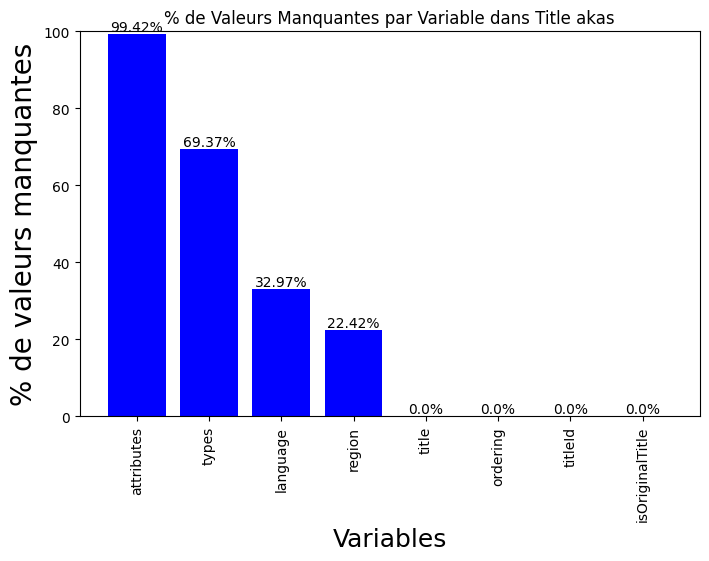

In [10]:
summarize_dataframe(df_title_akas,df_name ="Title akas")

In [ ]:
df_title_akas['types'].unique()

In [20]:
df_title_akas = df_title_akas.drop(columns=['attributes','types'])

In [21]:
#supprimer les lignes où les deux colonnes region et language sont NaN
df_title_akas = df_title_akas.dropna(subset=['region', 'language'], how='all')


In [22]:
df_title_akas['language'].unique()

array([nan, 'ja', 'en', 'sv', 'bg', 'tr', 'ru', 'es', 'sr', 'cs', 'fr',
       'hi', 'cmn', 'sk', 'fa', 'ca', 'qbn', 'nl', 'pt', 'uz', 'uk',
       'qbp', 'ar', 'rn', 'bs', 'ga', 'de', 'yue', 'th', 'yi', 'ka', 'hr',
       'sl', 'he', 'it', 'tg', 'kk', 'da', 'el', 'fi', 'be', 'gsw', 'eu',
       'gl', 'az', 'ms', 'pl', 'id', 'mr', 'qbo', 'mi', 'la', 'ta', 'lt',
       'lv', 'af', 'hy', 'ur', 'bn', 'te', 'ro', 'kn', 'ml', 'mk', 'tl',
       'cy', 'et', 'gd', 'qal', 'gu', 'lb', 'zu', 'xh', 'eka', 'ko', 'tk',
       'ky', 'wo', 'zh', 'hu', 'no', 'is', 'sq', 'vi', 'pa', 'sd', 'ps',
       'ku', 'roa', 'tn', 'rm', 'su', 'jv', 'st', 'prs', 'jsl', 'fro',
       'haw', 'mn', 'am', 'ne', 'qac', 'lo', 'my', 'myv', 'br', 'iu',
       'hil', 'cr'], dtype=object)

In [23]:
df_title_akas['region'].unique()

array(['DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP', 'RO', 'FR', 'GB', 'CA',
       'PT', 'MX', 'AU', 'IT', 'ES', 'FI', 'UY', 'AR', 'PL', 'BG', 'RS',
       'BR', 'TR', 'SK', 'XWW', 'DK', 'XEU', 'CZ', 'SE', 'NZ', 'KZ', 'NO',
       'XYU', 'AT', 'VE', 'CSHH', 'SI', 'SUHH', 'IN', 'NL', 'LT', 'HR',
       'TW', 'CN', 'CO', 'IR', 'SG', 'BE', 'EC', 'IE', 'VN', 'PH', 'DZ',
       'CH', 'XWG', 'BF', 'HK', 'XSA', 'EE', 'IS', 'PR', 'DDDE', 'IL',
       'EG', 'XKO', 'CL', 'JM', 'KR', 'PE', 'BY', 'GE', 'BA', 'DO', 'TH',
       'AE', 'ZA', 'PA', 'LV', 'TJ', 'XSI', 'MY', 'UZ', 'AZ', 'ID', 'PK',
       'BD', 'CU', 'AL', 'BO', 'XAS', 'NG', 'YUCS', 'GT', 'PY', 'SV',
       'CR', 'KP', 'BUMM', 'MM', 'XPI', 'BJ', 'CM', 'KG', 'MA', 'GL',
       'MN', 'LI', 'LU', 'MZ', 'MK', 'BM', 'MD', 'ME', 'LB', 'IQ', 'TM',
       'TN', 'HT', 'AM', 'CI', 'LK', 'NP', 'QA', 'SY', 'TO', 'CG', 'SN',
       'GH', 'JO', 'NE', 'GN', 'VDVN', 'TD', 'SO', 'SD', 'MC', 'TT', 'GA',
       'BS', 'LY', 'AO', 'KH', 'MR', 'AF', 'MG', 'ML',

In [7]:
df_title_akas[df_title_akas['titleId']== 'tt9908860']

,titleId,ordering,title,region,language,isOriginalTitle
50646631,tt9908860,10,Blown Away,IL,en,0
50646632,tt9908860,11,Blown Away,IN,hi,0
50646633,tt9908860,12,Blown Away,MX,NaN,0
50646634,tt9908860,13,Blown Away,NL,NaN,0
50646635,tt9908860,14,Blown Away,PH,en,0
50646636,tt9908860,15,Blown Away,SE,NaN,0
50646637,tt9908860,16,Blown Away,TH,en,0
50646638,tt9908860,17,Blown Away,TR,tr,0
50646639,tt9908860,18,Blown Away,US,NaN,0
50646640,tt9908860,19,Blown Away,ZA,en,0


In [8]:
df_title_akas[df_title_akas['titleId']== 'tt0000015']

,titleId,ordering,title,region,language,isOriginalTitle
180,tt0000015,2,Alrededor de una caseta de baño,ES,NaN,0
181,tt0000015,3,Around a Bathing Hut,US,NaN,0
182,tt0000015,4,Around a Cabin,US,NaN,0
183,tt0000015,5,Autour d'une cabine,FR,NaN,0
184,tt0000015,6,Egy kabin körül,HU,NaN,0
185,tt0000015,7,Mésaventures d'un copurchic aux bains de mer,FR,NaN,0
186,tt0000015,8,Вoкруг кабинки,RU,NaN,0
187,tt0000015,9,Навколо кабінки,UA,NaN,0


In [9]:
df_title_akas[df_title_akas['titleId']== 'tt0000010']

,titleId,ordering,title,region,language,isOriginalTitle
80,tt0000010,10,L'uscita dalle fabbriche Lumière,IT,NaN,0
81,tt0000010,11,La salida de la fábrica Lumière en Lyon,ES,NaN,0
82,tt0000010,12,La sortie de l'usine Lumière,FR,NaN,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,NaN,0
84,tt0000010,14,La sortie des usines Lumière,FR,NaN,0
85,tt0000010,15,Leaving the Factory,US,NaN,0
86,tt0000010,16,Lumière-fabrikens arbetare,FI,sv,0
87,tt0000010,17,Munkások elhagyják a lyoni Lumiére-gyárat,HU,NaN,0
88,tt0000010,18,Salida de obreros de la fábrica Lumiere,UY,NaN,0
89,tt0000010,19,Sortie d'usine,FR,NaN,0


Problème : doublons dans les titres français.
on doit s'assurer que chaque film n'a qu'un seul titre en français : choisir un seul titre en francais par titleId


In [24]:
df_title_akas['region'] = df_title_akas['region'].fillna('unknown')
df_title_akas['language'] = df_title_akas['language'].fillna('unknown')

In [25]:
df_french_titles = df_title_akas[(df_title_akas['language'] == 'fr') | (df_title_akas['region'] == 'FR')]

In [12]:
print(f'nombre de doublons de titre de films en francais {df_french_titles.duplicated(subset=['titleId'], keep=False).sum()}')

nombre de doublons de titre de films en francais 117079


In [13]:
duplicates = df_french_titles[df_french_titles.duplicated(subset=['titleId'], keep=False)]
display(duplicates)

,titleId,ordering,title,region,language,isOriginalTitle
82,tt0000010,12,La sortie de l'usine Lumière,FR,unknown,0
83,tt0000010,13,La sortie des ouvriers de l'usine Lumière,FR,unknown,0
84,tt0000010,14,La sortie des usines Lumière,FR,unknown,0
89,tt0000010,19,Sortie d'usine,FR,unknown,0
101,tt0000010,5,La sortie de l'usine Lumière à Lyon,FR,unknown,0
...,...,...,...,...,...,...
50646647,tt9908860,25,Verre la victoire,CA,fr,0
50649219,tt9910728,5,Zalim Istanbul,CA,fr,0
50649222,tt9910728,8,Zalim Istanbul,FR,unknown,0
50663268,tt9916362,14,Les sorcières d'Akelarre,CA,fr,0


In [26]:
df_french_titles = df_french_titles.drop_duplicates(subset=['titleId'])


In [27]:
df_title_french = df_french_titles[['titleId', 'title']].rename(columns={'title': 'title_in_french'})


In [28]:
df_title_french

,titleId,title_in_french
12,tt0000002,Le clown et ses chiens
21,tt0000003,Pauvre Pierrot
30,tt0000004,Un bon bock
82,tt0000010,La sortie de l'usine Lumière
114,tt0000012,L'arrivée d'un train en gare de La Ciotat
...,...,...
50664184,tt9916844,Épisode #3.15
50664192,tt9916846,Épisode #3.18
50664200,tt9916848,Épisode #3.17
50664208,tt9916850,Épisode #3.19


In [51]:
df_title_akas_fr= df_title_akas[df_title_akas['region'] == 'FR'] # Récupération des films sorties en France

3521                    De vervloekte molen
5669        Madame Babylas aime les animaux
8607                        Le diamant noir
8609                      De zwarte diamant
8611                           La pie noire
                         ...               
50632913                      Chers parents
50635344              The sicilian Dragon 2
50645360                            Le lion
50660021        Wien is 't Hof van Commerce
50662999      H.A.N (Hommes Animaux Nature)
Name: title, Length: 38286, dtype: object

In [ ]:
def assign_titles(row):
    if row['language'] == 'fr':
        return row['title'], None  # Titre en français
    elif row['language'] == 'en':
        return None, row['title']  # Titre en anglais
    
    # Si la langue est manquante (NaN), se baser sur la région
    if pd.isna(row['language']) and isinstance(row['region'], str):
        if row['region'] == 'FR':  # Région francophone
            return row['title'], None
        elif row['region'] in ['US', 'GB']:  # Région anglophone
            return None, row['title']
    
    # Si aucune condition n'est remplie, ne pas assigner de titre
    return None, None


In [ ]:
# creer deux colonnes pour les titres en francais et en anglais si disponible 
df_title_akas[['titre_fr', 'titre_en']] = df_title_akas.apply(assign_titles, axis=1, result_type='expand')

In [29]:
df_title_french.to_csv('datasets_nettoye/title_french.csv',index = False , encoding = 'utf-8')

In [2]:
df_name_basics = pd.read_csv('datasets/name.basics.tsv',sep = "\t",na_values='\\N')

Résumé du name basics
Shape : (14027577, 6)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14027577 entries, 0 to 14027576
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 642.1+ MB

 Apercu des premières lignes du name basics :


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0043044"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


Valeurs manquantes par colonne dans name basics :
nconst                      0
primaryName                59
birthYear            13393798
deathYear            13789789
primaryProfession     2724686
knownForTitles        1588378
dtype: int64
Total des valeurs manquantes dans name basics : 31496710


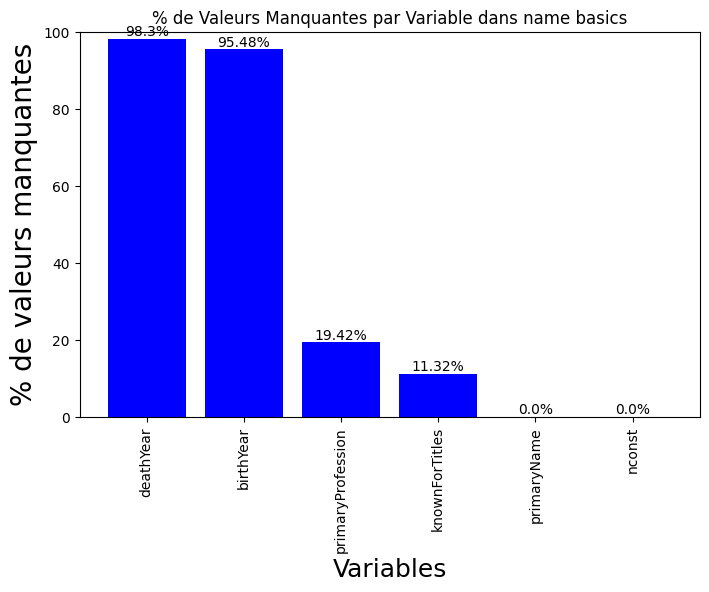

In [14]:
summarize_dataframe(df_name_basics,df_name ="name basics")

In [6]:
print(f"Nombre d'identifiants de personnages dupliqués : {df_name_basics.duplicated(subset=['nconst']).sum()}")

Nombre d'identifiants de personnages dupliqués : 0


In [19]:
# Nombre de personnages uniques
nombre_personnages_uniques = df_name_basics['nconst'].nunique()
print(f"Nombre total de personnages : {nombre_personnages_uniques}")


Nombre total de personnages : 14027577


In [30]:
unique_values_profeesion = df_name_basics['primaryProfession'].unique()
print(f'Les professions sont : {list(unique_values_profeesion)}')

['actor,miscellaneous,producer', 'actress,soundtrack,archive_footage', 'actress,music_department,producer', 'actor,writer,music_department', 'writer,director,actor', 'actress,producer,soundtrack', 'actor,producer,miscellaneous', 'actor,director,writer', 'actor,producer,director', 'actor,director,producer', 'actor,stunts,producer', 'actress,make_up_department,producer', 'actress,producer,miscellaneous', 'actor,miscellaneous,archive_footage', 'composer,music_department,actor', 'actress,music_department,soundtrack', 'actor,producer,soundtrack', 'music_department,composer,miscellaneous', 'actor,writer,soundtrack', 'actress,miscellaneous,archive_footage', 'actress,writer,soundtrack', 'director,producer,writer', 'actor,miscellaneous,soundtrack', 'music_department,composer,actor', 'actor,writer,director', 'actor,miscellaneous,director', 'director,writer,producer', 'writer,director,assistant_director', 'actor,producer,camera_department', 'actor,writer,miscellaneous', 'actor,producer,writer', '

In [3]:
# Les colonnes birthYear et deathYear sont supprimées car elles contiennent plus de 95% de valeurs manquantes
df_name_basics_clean = df_name_basics.drop(columns=['deathYear'])

In [4]:
#Conserver uniquement les personnages ayant des professions pertinentes : acteur, actrice, producteur, réalisateur, scénariste
df_name_basics_clean = df_name_basics_clean[df_name_basics_clean['primaryProfession'].astype(str).str.contains('actor|actress|producer|director|writer', regex=True, na=False)]

In [22]:
print(f"Dimensions avant nettoyage : {df_name_basics.shape}")
print(f"Dimensions après nettoyage : {df_name_basics_clean.shape}")

Dimensions avant nettoyage : (14027577, 6)
Dimensions après nettoyage : (7180144, 4)


In [5]:
df_name_basics_clean.to_csv("datasets_nettoye/df_name_basics_clean.csv", index= False)

In [5]:
df_name_basics_clean = pd.read_csv("datasets_nettoye/df_name_basics_clean.csv",sep = ",")

In [6]:
df_title_principals_cleaned = pd.read_csv("datasets_nettoye/df_title_principals_clean.csv",sep = ",")

In [7]:
# Fusionner les informations des rôles (title_principals) avec les informations des personnes (name_basics)
# Cela associe les colonnes de title_principals avec celles de name_basics
df_combine_titleprincipals_namebasics= pd.merge(
    df_title_principals_cleaned, # DataFrame contenant les rôles pour chaque titre
    df_name_basics_clean, #DataFrame contenant les informations sur les personnes
    how='left', #Garder tous les titres même si les informations de personnes sont manquantes
    on ='nconst')

In [13]:
df_combine_titleprincipals_namebasics

,tconst,ordering,nconst,category,primaryName,primaryProfession,knownForTitles
0,tt0000001,2,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000001,3,nm0005690,producer,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
2,tt0000002,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000003,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000003,2,nm1770680,producer,Julien Pappé,"cinematographer,animation_department,director","tt7331958,tt0000003,tt20707908,tt0094205"
...,...,...,...,...,...,...,...
62504842,tt9916880,17,nm0996406,director,Hilary Audus,"director,animation_department,art_department","tt0082509,tt0286490,tt2560206,tt0090315"
62504843,tt9916880,18,nm1482639,writer,Lucinda Whiteley,"producer,writer,script_department","tt1684555,tt0985991,tt0373533,tt13034096"
62504844,tt9916880,19,nm2586970,writer,Francesca Simon,"writer,miscellaneous","tt0985991,tt1684555,tt0289832,tt3692102"
62504845,tt9916880,20,nm1594058,producer,Erica Angell,"producer,actress,animation_department","tt30311015,tt1443631,tt15007028,tt7636600"


In [14]:
df_combine_titleprincipals_namebasics.isna().sum()


tconst                    0
ordering                  0
nconst                    0
category                  0
primaryName          391343
primaryProfession    391338
knownForTitles       429091
dtype: int64

Problème : Lors de la jointure entre df_title_principals_cleaned et df_name_basics_clean, certains identifiants de personnages (nconst) présents dans df_title_principals_cleaned ne trouvent pas de correspondance dans df_name_basics_clean. Cela a entraîné des valeurs manquantes (NaN) dans la colonne primaryName, qui représente le nom des personnages.

In [27]:
nconst_nan = df_combine_titleprincipals_namebasics[df_combine_titleprincipals_namebasics['primaryName'].isna()]['nconst'].unique()
print(f"Identifiants nconst sans correspondance : {nconst_nan}")


Identifiants nconst sans correspondance : ['nm3692297' 'nm3691272' 'nm3692829' ... 'nm10538304' 'nm4447226'
 'nm10538349']


In [8]:
# Supprimer les lignes où primaryName est NaN
df_combine_titleprincipals_namebasics_cleaned = df_combine_titleprincipals_namebasics.dropna(subset=['primaryName','primaryProfession'])

Les personnages sans correspondance dans df_name_basics_clean ont été supprimés car leur nom est inconnu, ce qui rend ces données inutilisables pour l'analyse.

In [ ]:
df_combine_titleprincipals_namebasics_cleaned = df_combine_titleprincipals_namebasics_cleaned.drop(columns=['ordering',''])

In [16]:

print(f"Dimensions avant suppression : {df_combine_titleprincipals_namebasics.shape}")
print(f"Dimensions après suppression : {df_combine_titleprincipals_namebasics_cleaned.shape}")

Dimensions avant suppression : (62504847, 7)
Dimensions après suppression : (62113504, 7)


Probléme : 
Dans la dataframe df_combine_titleprincipals_namebasics , il est normal d'avoir des doublons dans tconst car chaque ligne représente une personne associée à un film. Un film peut avoir plusieurs personnes dans différents rôles (par exemple, 1 réalisateur,1 producteur, 2 écrivain).

Cependant, il n'est pas normal d'avoir des doublons lorsqu'on considére les colonnes tconst, nconst, et category ensemble. Cela signifierait qu'un même film (via tconst) a la même personne (via nconst) jouant exactement le même rôle (category) plusieurs fois, ce qui n'a pas de sens.

In [9]:
df_combine_titleprincipals_namebasics_cleaned

,tconst,ordering,nconst,category,primaryName,primaryProfession,knownForTitles
0,tt0000001,2,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000001,3,nm0005690,producer,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
2,tt0000002,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000003,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000003,2,nm1770680,producer,Julien Pappé,"cinematographer,animation_department,director","tt7331958,tt0000003,tt20707908,tt0094205"
...,...,...,...,...,...,...,...
62504842,tt9916880,17,nm0996406,director,Hilary Audus,"director,animation_department,art_department","tt0082509,tt0286490,tt2560206,tt0090315"
62504843,tt9916880,18,nm1482639,writer,Lucinda Whiteley,"producer,writer,script_department","tt1684555,tt0985991,tt0373533,tt13034096"
62504844,tt9916880,19,nm2586970,writer,Francesca Simon,"writer,miscellaneous","tt0985991,tt1684555,tt0289832,tt3692102"
62504845,tt9916880,20,nm1594058,producer,Erica Angell,"producer,actress,animation_department","tt30311015,tt1443631,tt15007028,tt7636600"


In [10]:
# Vérifier les doublons sur les colonnes tconst, nconst, et category
df_duplicates = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned.duplicated(subset=['tconst', 'nconst', 'category','primaryName'], keep=False)]

# Afficher les doublons si présents
if not df_duplicates.empty:
    print(f"Nombre de doublons : {len(df_duplicates)}")
    display(df_duplicates)
else:
    print("Aucun doublon trouvé dans tconst, nconst, et category.")


Aucun doublon trouvé dans tconst, nconst, et category.


In [11]:
df_combine_titleprincipals_namebasics_cleaned.to_csv("datasets_nettoye/df_combine_titleprincipals_namebasics_cleaned.csv")

In [12]:
df_combine_titleprincipals_namebasics_cleaned= pd.read_csv("datasets_nettoye/df_combine_titleprincipals_namebasics_cleaned.csv")

In [14]:
df_visualization = pd.merge(
    filtered_movies_principale,
    df_combine_titleprincipals_namebasics_cleaned,
    how='left',  # pour conserver uniquement les films de filtered_movies_principale
    on='tconst'
)

In [15]:
df_visualization

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,title_in_french,ordering,nconst,category,primaryName,primaryProfession,knownForTitles
0,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,NaN,90.31,"Action,Crime",NaN,NaN,NaN,1.0,nm0681726,actor,Lupu Pick,"actor,director,producer","tt0017248,tt0011780,tt0009296,tt0439040"
1,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,NaN,90.31,"Action,Crime",NaN,NaN,NaN,2.0,nm0692612,actress,Edith Posca,actress,"tt0459172,tt0012235,tt0013809,tt0154741"
2,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,NaN,90.31,"Action,Crime",NaN,NaN,NaN,3.0,nm0726256,actor,Johannes Riemann,"actor,director,writer","tt0027319,tt0025292,tt0022071,tt0027846"
3,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,NaN,90.31,"Action,Crime",NaN,NaN,NaN,4.0,nm0776458,actor,Fritz Schulz,"actor,director,composer","tt0327689,tt0448584,tt0262377,tt0028263"
4,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,NaN,90.31,"Action,Crime",NaN,NaN,NaN,5.0,nm0666006,actor,Albert Patry,actor,"tt0442394,tt11100780,tt0011442,tt6274314"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265036,tt9916730,6 Gunn,6 Gunn,2017,NaN,116.00,Drama,7.0,12.0,NaN,12.0,nm10538613,producer,Abhishek Jathar,producer,tt9916730
3265037,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,49.00,Documentary,NaN,NaN,NaN,11.0,nm9272490,director,Angela Gurgel,"director,writer,producer","tt10011778,tt10011832,tt9916754,tt9910688"
3265038,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,49.00,Documentary,NaN,NaN,NaN,12.0,nm8349149,writer,Vinicius Augusto Bozzo,"writer,editor,director","tt9916754,tt9910688,tt10011832,tt10118270"
3265039,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,49.00,Documentary,NaN,NaN,NaN,13.0,nm9272490,writer,Angela Gurgel,"director,writer,producer","tt10011778,tt10011832,tt9916754,tt9910688"


In [16]:
df_visualization.to_csv("datasets_nettoye/df_visualization.csv")

In [14]:
df_combine_titleprincipals_namebasics_cleaned = df_combine_titleprincipals_namebasics_cleaned.drop(columns='Unnamed: 0')

In [15]:
df_combine_titleprincipals_namebasics_cleaned

,tconst,ordering,nconst,category,primaryName,primaryProfession,knownForTitles
0,tt0000001,2,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
1,tt0000001,3,nm0005690,producer,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
2,tt0000002,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,tt0000003,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
4,tt0000003,2,nm1770680,producer,Julien Pappé,"cinematographer,animation_department,director","tt7331958,tt0000003,tt20707908,tt0094205"
...,...,...,...,...,...,...,...
62113499,tt9916880,17,nm0996406,director,Hilary Audus,"director,animation_department,art_department","tt0082509,tt0286490,tt2560206,tt0090315"
62113500,tt9916880,18,nm1482639,writer,Lucinda Whiteley,"producer,writer,script_department","tt1684555,tt0985991,tt0373533,tt13034096"
62113501,tt9916880,19,nm2586970,writer,Francesca Simon,"writer,miscellaneous","tt0985991,tt1684555,tt0289832,tt3692102"
62113502,tt9916880,20,nm1594058,producer,Erica Angell,"producer,actress,animation_department","tt30311015,tt1443631,tt15007028,tt7636600"


In [16]:
df_directors_writers = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned['category'].isin(["director", "writer"])] 

In [8]:
#Filtrer les catégories spécifiques :
#df_filtered_roles = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned['category'].isin(["director", "writer"])] 

In [ ]:
duplicates = df_directors_writers[df_directors_writers.duplicated(subset=['tconst', 'nconst', 'category'], keep=False)]
if not duplicates.empty:
    print(f"Nombre de doublons trouvés : {len(duplicates)}")
    print(duplicates.head())
else:
    print("Aucun doublon trouvé dans df_directors_writers.")

Dans cette cas, le fait qu'une même personne (identifiée par nconst) a plusieurs rôles (par exemple, director et writer) dans un même film (tconst). Cela n'est pas un duplicata au sens classique car les rôles sont différents et on peut avoir une même personne qui est à la fois réalisateur (director) et scénariste (writer) pour un même film.

In [18]:
# Regrouper tous les contributeurs pour un film :
df_grouped_directors_writers= df_directors_writers.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
df_grouped_directors_writers.rename(columns={'primaryName': 'contributors_directors_writers'}, inplace=True)
# Les contributors sont les realisateurs et les ecrivants

In [10]:
# Regrouper tous les contributeurs pour un film :
#df_grouped_filtered_roles = df_filtered_roles.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
#df_grouped_filtered_roles.rename(columns={'primaryName': 'contributors'}, inplace=True)
# Les contributors sont les realisateurs et les ecrivants


In [19]:
df_actors = df_combine_titleprincipals_namebasics_cleaned[
    df_combine_titleprincipals_namebasics_cleaned['category'].isin(["actor", "actress"])]

In [20]:
df_grouped_actors = df_actors.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
df_grouped_actors.rename(columns={'primaryName': 'contributors_actors'}, inplace=True)

In [2]:
filtered_movies_principale_tmdb = pd.read_csv('datasets_nettoye/filtered_movies_principale_tmdb.csv')

In [9]:
filtered_movies_principale_tmdb.isna().sum()

tconst                    0
primaryTitle              0
originalTitle             0
startYear                 0
runtimeMinutes            0
genres                    0
Decade                    0
averageRating             0
numVotes                  0
budget               238517
revenue              238517
original_language         0
poster_path               0
overview                  0
popularity                0
dtype: int64

In [10]:
filtered_movies_principale_tmdb['budget'] = filtered_movies_principale_tmdb['budget'].fillna(0)
filtered_movies_principale_tmdb['revenue'] = filtered_movies_principale_tmdb['revenue'].fillna(0)

In [11]:
filtered_movies_principale_tmdb.isna().sum()

tconst               0
primaryTitle         0
originalTitle        0
startYear            0
runtimeMinutes       0
genres               0
Decade               0
averageRating        0
numVotes             0
budget               0
revenue              0
original_language    0
poster_path          0
overview             0
popularity           0
dtype: int64

In [21]:
#Jointure avec le dataframe df_filtered_movies
df_final_ml = filtered_movies_principale_tmdb.merge(df_grouped_directors_writers, on='tconst', how='left').merge(df_grouped_actors, on='tconst', how='left')
# les actors et actresses ne sont pas inclure directement dans l'entrainement du modele , mais juste pour le filtre

In [11]:
#Jointure avec le dataframe df_filtered_movies
#df_final_ml = filtered_movies_principale_tmdb.merge(df_grouped_filtered_roles, on='tconst', how='left')
# Dans ce cas ,  les actors et actresses ne sont pas inclure directement dans le dataframe principal pour le machine learning

In [22]:
df_final_ml.shape

(361652, 17)

In [23]:
df_final_ml

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,Decade,averageRating,numVotes,budget,revenue,original_language,poster_path,overview,popularity,contributors_directors_writers,contributors_actors
0,tt0011801,Tötet nicht mehr,Tötet nicht mehr,2019,89.68,"Action,Crime",2010,5.637255,0.0,0.0,0.0,German,/39PDyEcYl2B3XeRcsCXJ4V72g8x.jpg,The director and co-writer Lupu Pick plays mus...,0.0,"Lupu Pick, Gerhard Lamprecht, Lupu Pick","Lupu Pick, Edith Posca, Johannes Riemann, Frit..."
1,tt0015414,La tierra de los toros,La tierra de los toros,2000,60.00,divers,2000,5.400000,17.0,0.0,0.0,unknown,unknown,unknown,91.8,Musidora,NaN
2,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.00,"Comedy,Fantasy,Romance",2000,6.400000,90792.0,48000000.0,76019048.0,English,/mUvikzKJJSg9khrVdxK8kg3TMHA.jpg,When her scientist ex-boyfriend discovers a po...,581068.8,"James Mangold, Steven Rogers, James Mangold","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki..."
3,tt0062336,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020,70.00,Drama,2020,6.400000,204.0,0.0,0.0,Spanish,/yzbqP9woGq2wGUJh0DzVXlr3Th7.jpg,"A man whose wife has committed suicide, appea...",1305.6,"Raúl Ruiz, Valeria Sarmiento, Raúl Ruiz, Omar ...","Rubén Sotoconil, Claudia Paz, Luis Alarcón, Sh..."
4,tt0062740,Blonde on a Bum Trip,Blonde on a Bum Trip,2024,65.00,Drama,2020,6.000000,80.0,0.0,0.0,unknown,unknown,unknown,480.0,Raf Mauro,"Alexis Wassel, Don Nevins, Barbara Spiegelberg..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361647,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,57.00,Documentary,2010,7.232135,0.0,0.0,0.0,unknown,unknown,unknown,0.0,"Angela Gurgel, Angela Gurgel, Ana Célia de Oli...",Oldair Soares Ammom
361648,tt9916680,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,2007,100.00,Documentary,2000,7.232135,0.0,0.0,0.0,unknown,unknown,unknown,0.0,"Luis Ospina, Luis Ospina, Diego Rojas",NaN
361649,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,89.68,Comedy,2010,7.700000,9.0,0.0,0.0,unknown,unknown,unknown,69.3,"Kanchan Nayak, Sudhir Nikam","Makarand Anaspure, Anvay Bendre, Prakash Dhotr..."
361650,tt9916730,6 Gunn,6 Gunn,2017,116.00,Drama,2010,7.000000,12.0,0.0,0.0,unknown,unknown,unknown,84.0,"Kiran Gawade, Kiran Gawade","Devadhar Archit, Sunil Barve, Ganesh Vasant Pa..."


In [24]:
df_final_ml.to_csv("datasets_nettoye/df_final_ml.csv")

In [4]:
df_combine_titleprincipals_namebasics_cleaned = pd.read_csv("datasets_nettoye/df_combine_titleprincipals_namebasics_cleaned.csv")

In [5]:
df_actors = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned['category'].isin(["actor", "actress"])]
df_actors_grouped = df_actors.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
df_actors_grouped.rename(columns={'primaryName': 'actors_list'}, inplace=True)


In [20]:
df_actors.to_csv("datasets_nettoye/df_actors.csv",index = False)

In [2]:
import pandas as pd 

In [3]:
df_actors = pd.read_csv("datasets_nettoye/df_actors.csv")

In [5]:
df_actors_recommande = df_actors[['primaryName','knownForTitles']]

In [9]:
df_actors_recommande = df_actors_recommande.dropna()

In [10]:
df_actors_recommande

,primaryName,knownForTitles
2,James J. Corbett,"tt0003730,tt0003116,tt0034778,tt0163131"
3,Peter Courtney,tt0000007
4,Fred Ott,"tt0000008,tt0285265,tt0240514"
5,Blanche Bayliss,tt0000009
6,William Courtenay,"tt0000009,tt0020355,tt0021535,tt0020403"
...,...,...
35821663,Sue Elliott-Nichols,"tt1983079,tt0985991,tt6217830,tt6941630"
35821664,Wayne Forester,"tt1710626,tt0453557,tt1135081,tt1699440"
35821665,Tamsin Heatley,"tt13034096,tt0083505,tt0289832,tt8612010"
35821666,Joanna Ruiz,"tt1663222,tt1699440,tt0985991,tt10951016"


In [11]:
df_actors_recommande.to_csv('datasets_nettoye/df_actors_recommande.csv')

In [28]:
df_actors_grouped

,tconst,actors_list
0,tt0000005,"Charles Kayser, John Ott"
1,tt0000007,"James J. Corbett, Peter Courtney"
2,tt0000008,Fred Ott
3,tt0000009,"Blanche Bayliss, William Courtenay, Chauncey D..."
4,tt0000014,"François Clerc, Benoît Duval"
...,...,...
6190844,tt9916848,"Pelin Akil, Ilter Akçebe, Zeynep Alkan, Ilgin ..."
6190845,tt9916850,"Pelin Akil, Ilter Akçebe, Zeynep Alkan, Ilgin ..."
6190846,tt9916852,"Pelin Akil, Ilter Akçebe, Zeynep Alkan, Ilgin ..."
6190847,tt9916856,"Leni Wesselman, Anna Fitoussi, Andreas Demmel,..."


In [10]:
# Filtrer les réalisateurs
df_directors = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned['category'].isin(["director"])]
df_directors_grouped = df_directors.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
df_directors_grouped.rename(columns={'primaryName': 'director_list'}, inplace=True) 

In [11]:
df_directors_grouped

,tconst,director_list
0,tt0000001,William K.L. Dickson
1,tt0000002,Émile Reynaud
2,tt0000003,Émile Reynaud
3,tt0000004,Émile Reynaud
4,tt0000007,"William K.L. Dickson, William Heise"
...,...,...
6114346,tt9916848,Hamdi Alkan
6114347,tt9916850,Hamdi Alkan
6114348,tt9916852,Hamdi Alkan
6114349,tt9916856,Johan Planefeldt


In [12]:

# Filtrer les scénaristes
df_writers = df_combine_titleprincipals_namebasics_cleaned[df_combine_titleprincipals_namebasics_cleaned['category'].isin(["writer"])]
df_writers_grouped = df_writers.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x)).reset_index()
df_writers_grouped.rename(columns={'primaryName': 'writer_list'}, inplace=True)

In [13]:
df_writers_grouped

,tconst,writer_list
0,tt0000009,Alexander Black
1,tt0000091,Georges Méliès
2,tt0000132,Georges Méliès
3,tt0000165,Fructuós Gelabert
4,tt0000174,Josef Sváb-Malostranský
...,...,...
5539207,tt9916848,"Yelda Acikgoz, Hamdi Alkan, Birol Elginöz, Nur..."
5539208,tt9916850,"Yelda Acikgoz, Hamdi Alkan, Birol Elginöz, Bir..."
5539209,tt9916852,"Yelda Acikgoz, Hamdi Alkan, Birol Elginöz, Nur..."
5539210,tt9916856,Johan Planefeldt


In [18]:
df_directors

,Unnamed: 0,tconst,ordering,nconst,category,primaryName,primaryProfession,knownForTitles
0,0,tt0000001,2,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
2,2,tt0000002,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
3,3,tt0000003,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
6,6,tt0000004,1,nm0721526,director,Émile Reynaud,"director,animation_department,producer","tt32169968,tt0000003,tt16763740,tt16763674"
12,12,tt0000007,3,nm0005690,director,William K.L. Dickson,"cinematographer,director,producer","tt1428455,tt1496763,tt0308254,tt0219560"
...,...,...,...,...,...,...,...,...
62113440,62504783,tt9916848,11,nm1485677,director,Hamdi Alkan,"director,writer,actor","tt1289683,tt1134549,tt7230418,tt8586316"
62113457,62504800,tt9916850,11,nm1485677,director,Hamdi Alkan,"director,writer,actor","tt1289683,tt1134549,tt7230418,tt8586316"
62113474,62504817,tt9916852,11,nm1485677,director,Hamdi Alkan,"director,writer,actor","tt1289683,tt1134549,tt7230418,tt8586316"
62113489,62504832,tt9916856,9,nm10538645,director,Johan Planefeldt,director,tt9916856


In [17]:
# Liste unique des réalisateurs
unique_directors = df_directors['primaryName'].dropna().unique()
nombre_directors =df_directors['primaryName'].dropna().nunique()
print(f'nombre total de realisateur est : {nombre_directors}') 

# Liste unique des scénaristes
unique_writers = df_writers['primaryName'].dropna().unique()
nombre_writers = df_writers['primaryName'].dropna().nunique()
print(f"nombre total d'ecrivans est : {nombre_writers}") 

# Liste unique des acteurs 
unique_actors = df_actors['primaryName'].dropna().unique()
nombre_actors = df_actors['primaryName'].dropna().nunique()
print(f"nombre total d'acteur et actrices est : {nombre_actors}") 

nombre total de realisateur est : 701308
nombre total d'ecrivans est : 891112
nombre total d'acteur et actrices est : 2859979


In [ ]:
# Acteur choisi par l'utilisateur
user_actor = "Leonardo DiCaprio"

# Filtrer les films où l'acteur est présent
df_filtered = df_actors_grouped[df_actors_grouped['actors'].str.contains(user_actor, na=False)]


In [ ]:
# Joindre avec un autre dataframe contenant des informations sur les films
#Une fois les films filtrés, vous pouvez les joindre à un autre dataframe pour obtenir des informations complémentaires,
#  comme le titre, l'année, le genre
df_final = df_filtered.merge(filtered_movies, on='tconst', how='inner')


In [2]:
#Le dataset complémentaire df_tmdb_full provenant de la base de données TMDb (The Movie Database)
df_tmdb_full = pd.read_csv('datasets/tmdb_full.csv',sep = ",")

C:\Users\abbou\AppData\Local\Temp\ipykernel_16476\497979784.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmdb_full = pd.read_csv('datasets/tmdb_full.csv',sep = ",")


Résumé du TMDB FULL
Shape : (309572, 25)
Types de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-nul

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']
1,False,NaN,0,['Adventure'],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,420,[],Released,NaN,"Peter Voss, Thief of Millions",False,0.000,0,[],[]
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"['Drama', 'Romance']",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese...","['', 'NZ', 'IT', 'JP', 'DE', 'PL', '']"
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"['Drama', 'Comedy', 'Crime']",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,73,['fi'],Released,NaN,Ariel,False,7.046,248,['Villealfa Filmproductions'],['FI']
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"['Drama', 'Comedy', 'Romance']",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76,['en'],Released,NaN,Shadows in Paradise,False,7.182,269,['Villealfa Filmproductions'],['FI']


Valeurs manquantes par colonne dans TMDB FULL :
adult                                0
backdrop_path                   157812
budget                               0
genres                               0
homepage                        265310
id                                   0
imdb_id                              0
original_language                    0
original_title                       0
overview                         27060
popularity                           0
poster_path                      45413
production_countries                 0
release_date                      8233
revenue                              0
runtime                              0
spoken_languages                     0
status                               0
tagline                         234999
title                                0
video                                0
vote_average                         0
vote_count                           0
production_companies_name            0
production_compa

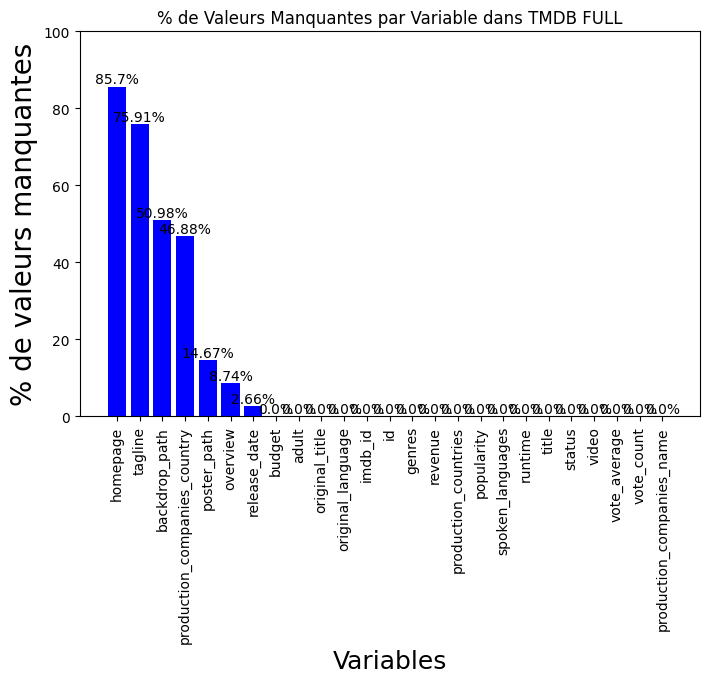

In [19]:
summarize_dataframe(df_tmdb_full,df_name ="TMDB FULL")

id : identifiant interne du dataset TMDb. Il est unique pour chaque film dans cette base spécifique.
imdb_id : identifiant du film sur IMDB (ex. : tt0055747), qui est universel et utilisé pour relier ce dataset aux autres datasets provenant d'IMDB.

In [55]:
# Trouver l'intersection des identifiants IMDb
common_ids = set(df_tmdb_full['imdb_id']).intersection(set(filtered_movies_principale['tconst']))

# Calculer le nombre de films communs
common_count = len(common_ids)
print(f"Nombre de films communs : {common_count}")


Nombre de films communs : 123290


In [ ]:
# Convertir la colonne 'release_date' en datetime
df_tmdb_full['release_date'] = pd.to_datetime(df_tmdb_full['release_date'], errors='coerce')

# Extraire les années
df_tmdb_full['release_year'] = df_tmdb_full['release_date'].dt.year

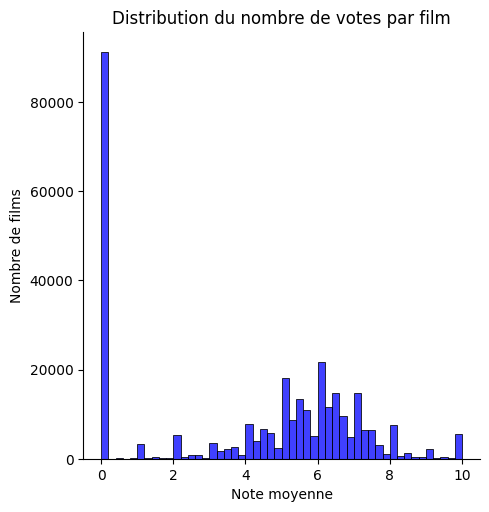

In [7]:
sns.displot(df_tmdb_full['vote_average'], kde=False, bins=50, color='blue')
plt.xlabel('Note moyenne')  
plt.ylabel('Nombre de films') 
plt.title('Distribution du nombre de votes par film')
plt.show()

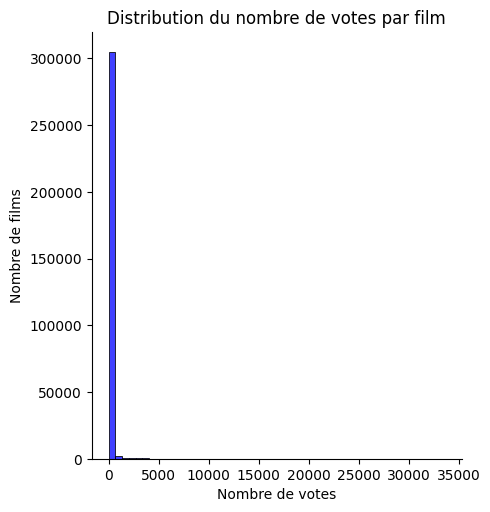

In [6]:
sns.displot(df_tmdb_full['vote_count'], kde=False, bins=50, color='blue')
plt.xlabel('Nombre de votes')  
plt.ylabel('Nombre de films') 
plt.title('Distribution du nombre de votes par film')
plt.show()

In [4]:
# Sélection des colonnes pertinentes :
df_tmdb_selected = df_tmdb_full[['imdb_id', 'budget', 'revenue', 'popularity', 'original_language','poster_path','overview',]]


In [61]:
df_tmdb_selected.isna().sum()

imdb_id                  0
budget                   0
revenue                  0
popularity               0
original_language        0
poster_path          45413
overview             27060
dtype: int64

In [65]:
df_tmdb_selected.describe()

,budget,revenue,popularity
count,3.095720e+05,3.095720e+05,309572.000000
mean,8.781720e+05,2.247857e+06,2.719860
std,8.275506e+06,3.023098e+07,21.206599
min,0.000000e+00,0.000000e+00,0.600000
25%,0.000000e+00,0.000000e+00,0.600000
50%,0.000000e+00,0.000000e+00,1.083000
75%,0.000000e+00,0.000000e+00,1.994000
max,5.793304e+08,2.923706e+09,5089.969000


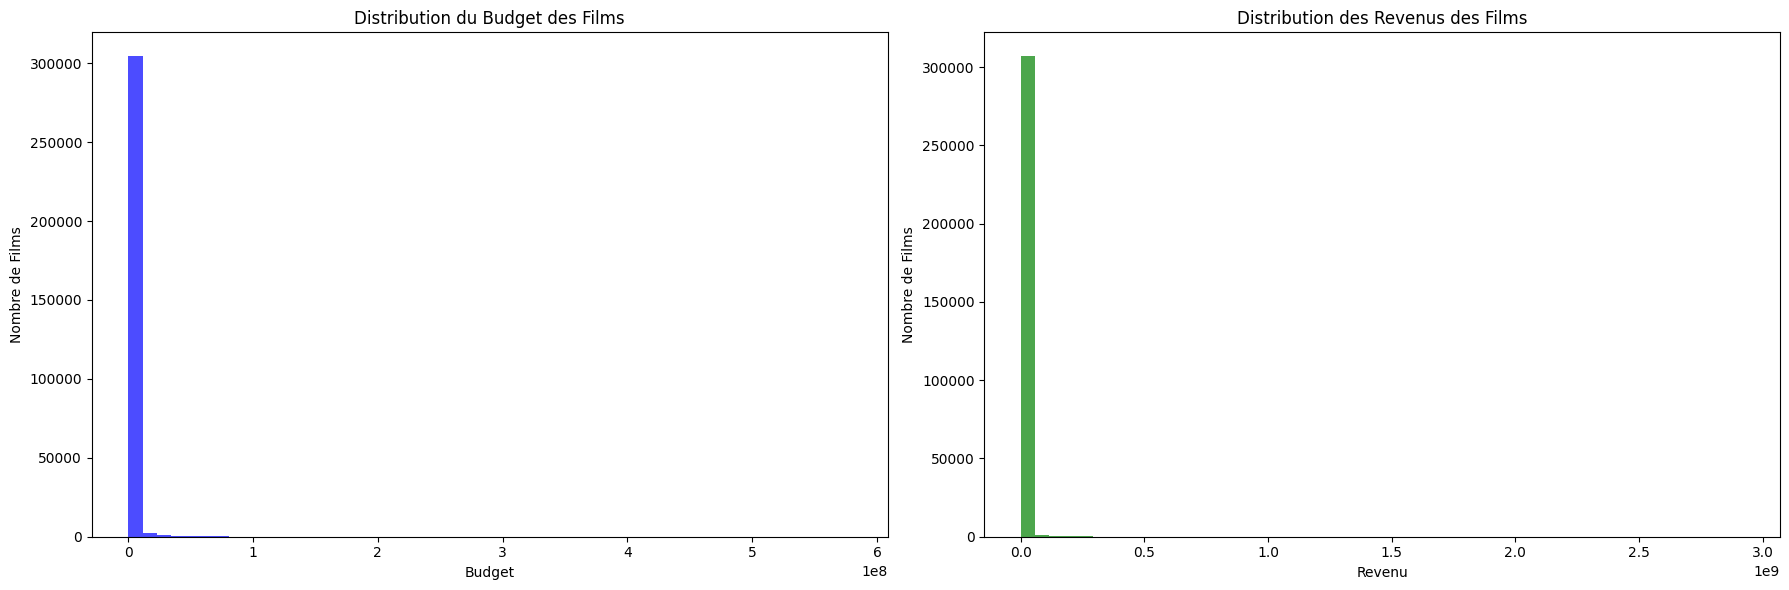

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes[0].hist(df_tmdb_selected['budget'], bins=50, color='blue', alpha=0.7)
axes[0].set_title('Distribution du Budget des Films')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Nombre de Films')

axes[1].hist(df_tmdb_selected['revenue'], bins=50, color='green', alpha=0.7)
axes[1].set_title('Distribution des Revenus des Films')
axes[1].set_xlabel('Revenu')
axes[1].set_ylabel('Nombre de Films')

plt.tight_layout()
plt.show()


Problème de données dans Budget et Revenus: 
Notre analyse préliminaire des colonnes de budget et de revenus montre que 75% des films affichent des valeurs nulles pour ces deux variables. 
La majorité des enregistrements indiquent donc des valeurs de zéro, tandis que seuls quelques films montrent des chiffres significativement élevés.

 Ces colonnes ne fournissent par conséquent aucune information utile ou fiable pour la majorité des films. En raison de ce manque de pertinence, nous avons décidé d'exclure le budget et les revenus de nos analyses principales, préférant nous concentrer sur des données qui apportent des insights plus consistants et informatifs.

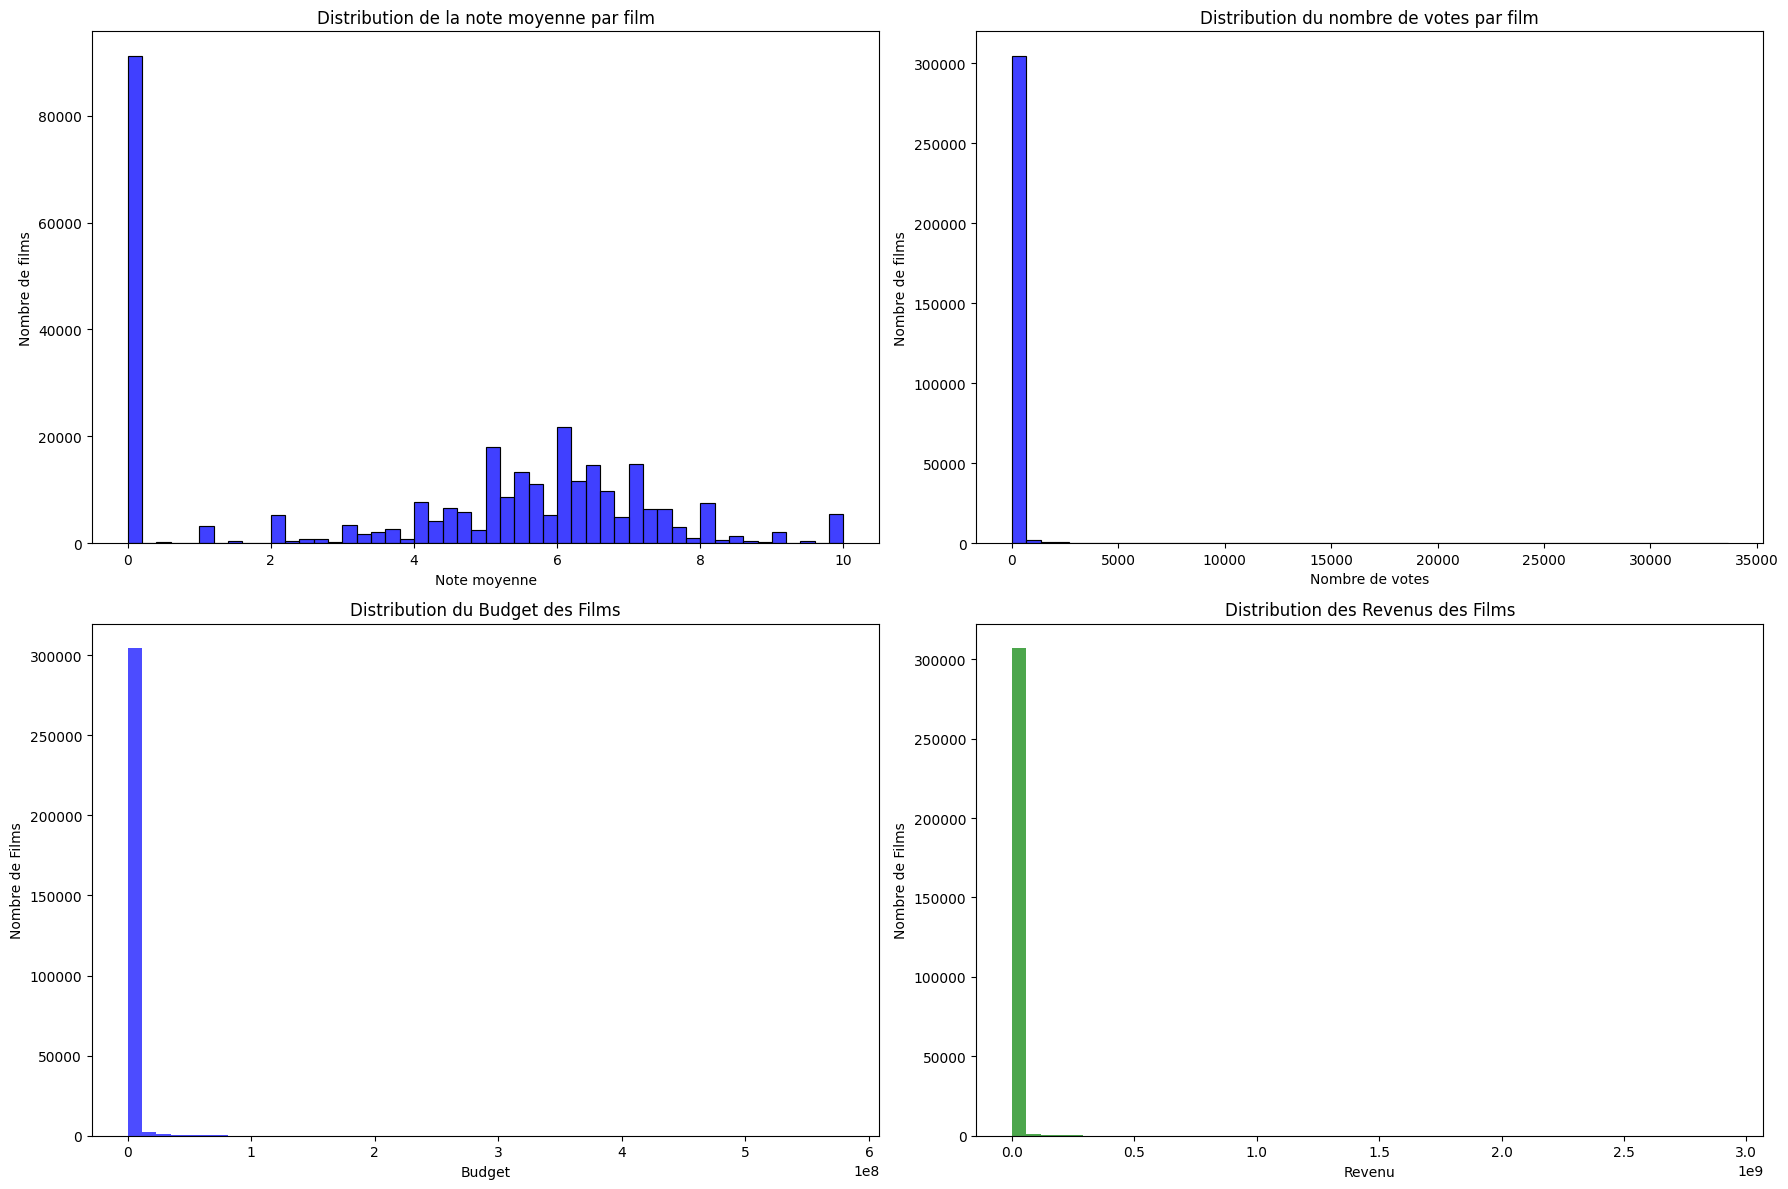

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.histplot(df_tmdb_full['vote_average'], kde=False, bins=50, color='blue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Note moyenne')
axes[0, 0].set_ylabel('Nombre de films')
axes[0, 0].set_title('Distribution de la note moyenne par film')

sns.histplot(df_tmdb_full['vote_count'], kde=False, bins=50, color='blue', ax=axes[0, 1])
axes[0, 1].set_xlabel('Nombre de votes')
axes[0, 1].set_ylabel('Nombre de films')
axes[0, 1].set_title('Distribution du nombre de votes par film')


axes[1, 0].hist(df_tmdb_full['budget'], bins=50, color='blue', alpha=0.7)
axes[1, 0].set_title('Distribution du Budget des Films')
axes[1, 0].set_xlabel('Budget')
axes[1, 0].set_ylabel('Nombre de Films')


axes[1, 1].hist(df_tmdb_full['revenue'], bins=50, color='green', alpha=0.7)
axes[1, 1].set_title('Distribution des Revenus des Films')
axes[1, 1].set_xlabel('Revenu')
axes[1, 1].set_ylabel('Nombre de Films')

plt.tight_layout()
plt.show()


In [33]:
# Identifier les doublons pour imdb_id
df_duplicates = df_tmdb_selected[df_tmdb_selected.duplicated(subset=['imdb_id'], keep=False)]
if not df_duplicates.empty:
    print(f"Nombre de doublons trouvés : {len(df_duplicates)}")
    display(df_duplicates)
else:
    print("Aucun doublon trouvé.")


Aucun doublon trouvé.


In [62]:
print(f' Nombre total de film dans TMDB : {df_tmdb_selected['imdb_id'].nunique()}')

 Nombre total de film dans TMDB : 309572


In [ ]:
df_tmdb_selected['release_date'] = pd.to_datetime(df_tmdb_selected['release_date'])
df_tmdb_selected['year'] = df_tmdb_selected['release_date'].dt.year.astype('Int64')
df_tmdb_selected = df_tmdb_selected.drop(columns=['release_date'])

In [61]:
df_tmdb_selected['original_language'].unique()

array(['en', 'de', 'fr', 'fi', 'he', 'es', 'zh', 'ja', 'da', 'ko', 'pl',
       'sv', 'it', 'bs', 'hi', 'ru', 'no', 'pt', 'nl', 'el', 'cs', 'bn',
       'cn', 'tn', 'sr', 'mn', 'et', 'is', 'ca', 'ro', 'hu', 'se', 'ps',
       'th', 'tr', 'sh', 'fa', 'ht', 'bg', 'zu', 'ar', 'ku', 'bo', 'tl',
       'hr', 'ta', 'id', 'am', 'lt', 'iu', 'pa', 'te', 'nb', 'xx', 'vi',
       'ml', 'mk', 'sk', 'af', 'ms', 'uk', 'sl', 'gu', 'ne', 'mr', 'si',
       'ur', 'gl', 'or', 'yo', 'lg', 'lv', 'kn', 'bm', 'ha', 'az', 'ka',
       'eu', 'sq', 'sg', 'sw', 'cy', 'lo', 'ce', 'uz', 'hy', 'kl', 'km',
       'ab', 'ky', 'yi', 'wo', 'kk', 'ig', 'as', 'ug', 'qu', 'mi', 'ga',
       'lb', 'ba', 'mo', 'kg', 'st', 'la', 'be', 'gn', 'so', 'sa', 'my',
       'jv', 'ks', 'dv', 'mt', 'dz', 'fy', 'xh', 'su', 'rw', 'tw', 'sd',
       'tk', 'rm', 'mg', 'nn', 'os', 'ak', 'fo', 'ff', 'ln', 'ny', 'gd',
       'eo', 'tg', 'tt', 'mh', 'ay', 'om', 'ss', 'ie', 'sm', 'ia', 'kw',
       'nv', 'ik', 'cr', 'sc', 'cv', 'to', 'li', 'o

In [3]:
import pycountry
def get_language_names(code):
    try:
        # Récupérer le nom de la langue
        language = pycountry.languages.get(alpha_2=code)
        return language.name if language else "Langue inconnue"
    except KeyError:
            return "Langue inconnue"

In [6]:
df_tmdb_selected['original_language'] = df_tmdb_selected['original_language'].apply(get_language_names)

C:\Users\abbou\AppData\Local\Temp\ipykernel_12676\1929321997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmdb_selected['original_language'] = df_tmdb_selected['original_language'].apply(get_language_names)


In [7]:
df_tmdb_selected['original_language'] 

0         English
1          German
2          French
3         Finnish
4         Finnish
           ...   
309567    Chinese
309568    Russian
309569    Spanish
309570    English
309571     Korean
Name: original_language, Length: 309572, dtype: object

In [8]:
df_tmdb_selected

,imdb_id,budget,revenue,popularity,original_language,poster_path,overview
0,tt0029927,0,0,2.852,English,/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg,Blondie and Dagwood are about to celebrate the...
1,tt0011436,0,0,1.091,German,/6xUbUCvndklbGVYiljHr34NTxSl.jpg,NaN
2,tt0055747,0,0,3.770,French,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,Love at Twenty unites five directors from five...
3,tt0094675,0,0,9.214,Finnish,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,Taisto Kasurinen is a Finnish coal miner whose...
4,tt0092149,0,0,6.282,Finnish,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,"An episode in the life of Nikander, a garbage ..."
...,...,...,...,...,...,...,...
309567,tt24962414,0,0,1.307,Chinese,/tzF2BndyY3HIf2KjJR1FBYoIqTp.jpg,The film tells the story of the heavy-duty pol...
309568,tt17352384,0,0,1.238,Russian,/nqMk6TIUwqSMRc6QPKYguNr9Ql0.jpg,Mozambique requests from Russia is being helpe...
309569,tt8223104,0,0,0.600,Spanish,/btNlb2H3NXuBCN5J1FB9IVddYR.jpg,"An account of the life, work and many triumphs..."
309570,tt14213656,0,0,2.558,English,/uLfathKx9hauVKdasJc8A720kvb.jpg,"Three Canadian Holocaust survivors, with unans..."


In [70]:
df_tmdb_selected['genres'].dtype

dtype('O')

In [71]:
df_tmdb_selected['genres'] = df_tmdb_selected['genres'].apply(eval)


In [74]:
df_tmdb_selected= df_tmdb_selected.explode('genres')  # Chaque genre est maintenant sur une ligne


In [91]:
genres_encoded = pd.get_dummies(df_exploded['genres'], prefix='genre')

In [92]:
genres_encoded

,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
309569,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
309569,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
309570,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Appliquer One-Hot Encoding sur la colonne 'genres'
genres_encoded = pd.get_dummies(df_exploded['genres'], prefix='genre')

# Ajouter les colonnes encodées au DataFrame
df_encoded = pd.concat([df_tmdb_selected, genres_encoded], axis=1)


In [90]:
df_tmdb_selected_final = df_encoded.groupby('imdb_id', as_index=False).max()


In [ ]:
#Revenu total par genre : Permet d'identifier les genres les plus lucratifs.